In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns',None)

In [2]:
train = pd.read_csv('Tra_add_NaN_final.csv')
target = '35'
IDcol = 'application_key'

In [6]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8208
AUC Score (Train): 0.844927
CV Score : Mean - 0.8364332 | Std - 0.006485179 | Min - 0.8259685 | Max - 0.8436405


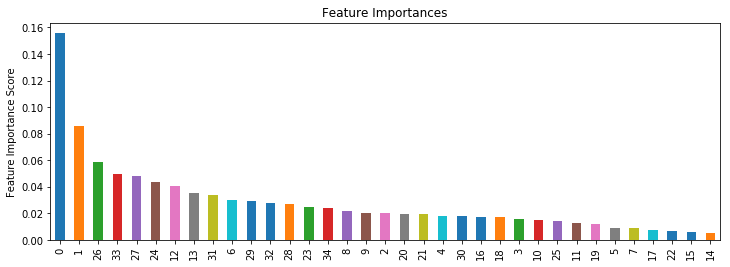

In [7]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

In [21]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {"n_estimators":[80,90,100,110,120,130,140,150,160,170]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [22]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83887, std: 0.00574, params: {'n_estimators': 80},
  mean: 0.83907, std: 0.00569, params: {'n_estimators': 90},
  mean: 0.83908, std: 0.00563, params: {'n_estimators': 100},
  mean: 0.83907, std: 0.00566, params: {'n_estimators': 110},
  mean: 0.83895, std: 0.00558, params: {'n_estimators': 120},
  mean: 0.83878, std: 0.00549, params: {'n_estimators': 130},
  mean: 0.83874, std: 0.00552, params: {'n_estimators': 140},
  mean: 0.83862, std: 0.00562, params: {'n_estimators': 150},
  mean: 0.83858, std: 0.00555, params: {'n_estimators': 160},
  mean: 0.83839, std: 0.00550, params: {'n_estimators': 170}],
 {'n_estimators': 100},
 0.8390778311753678)

In [24]:
param_test2 = {'max_depth':[5,7,9,11,13,15,17,19], 'min_samples_split':[200,400,600,800,1000,1200,1400,1600]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83725, std: 0.00641, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.83672, std: 0.00650, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.83692, std: 0.00660, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.83723, std: 0.00645, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.83656, std: 0.00652, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.83712, std: 0.00646, params: {'max_depth': 5, 'min_samples_split': 1200},
  mean: 0.83720, std: 0.00656, params: {'max_depth': 5, 'min_samples_split': 1400},
  mean: 0.83740, std: 0.00630, params: {'max_depth': 5, 'min_samples_split': 1600},
  mean: 0.83688, std: 0.00630, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.83639, std: 0.00646, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.83718, std: 0.00677, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.83729, std: 0.00632, params: {'max_depth': 7, 'min_samples_split': 800},


# optimum ans : max_depth': 7, 'min_samples_split': 1400}, 0.8382614742757812

In [25]:
param_test3 = {'min_samples_split':[1000,1200,1400,1600,1800,2000,2200,2400], 'min_samples_leaf':[30,40,50,60,70,80]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83830, std: 0.00616, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.83862, std: 0.00600, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.83844, std: 0.00601, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.83795, std: 0.00607, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.83783, std: 0.00622, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.83832, std: 0.00590, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.83838, std: 0.00614, params: {'min_samples_leaf': 30, 'min_samples_split': 2200},
  mean: 0.83819, std: 0.00612, params: {'min_samples_leaf': 30, 'min_samples_split': 2400},
  mean: 0.83810, std: 0.00662, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.83827, std: 0.00648, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.83851, std: 0.00616, params: {'min_samples_leaf': 40, 'min_samples_spl

# {'min_samples_leaf': 80, 'min_samples_split': 1200},0.8386305115960596)


Model Report
Accuracy : 0.8306
AUC Score (Train): 0.861552
CV Score : Mean - 0.8386305 | Std - 0.006171894 | Min - 0.828031 | Max - 0.8451674


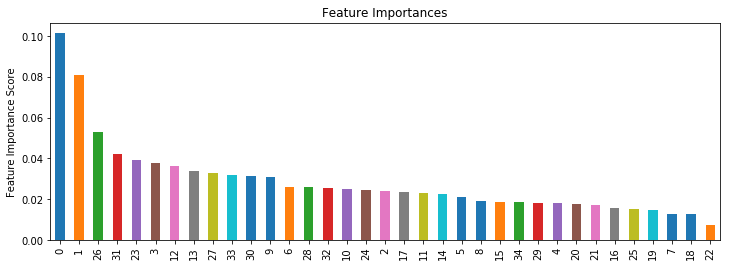

In [26]:
modelfit(gsearch3.best_estimator_, train, predictors)

In [27]:
param_test4 = {'max_features':[7,9,11,13,15,17,19,21,23,25]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=100,max_depth=7, min_samples_split=1200, min_samples_leaf=80, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83745, std: 0.00587, params: {'max_features': 7},
  mean: 0.83638, std: 0.00615, params: {'max_features': 9},
  mean: 0.83680, std: 0.00599, params: {'max_features': 11},
  mean: 0.83596, std: 0.00642, params: {'max_features': 13},
  mean: 0.83613, std: 0.00586, params: {'max_features': 15},
  mean: 0.83614, std: 0.00559, params: {'max_features': 17},
  mean: 0.83535, std: 0.00669, params: {'max_features': 19},
  mean: 0.83576, std: 0.00573, params: {'max_features': 21},
  mean: 0.83619, std: 0.00662, params: {'max_features': 23},
  mean: 0.83582, std: 0.00676, params: {'max_features': 25}],
 {'max_features': 7},
 0.8374472685241372)

# max_number of feature 7


Model Report
Accuracy : 0.8386
AUC Score (Train): 0.871707
CV Score : Mean - 0.8374473 | Std - 0.005872923 | Min - 0.8275307 | Max - 0.8443453


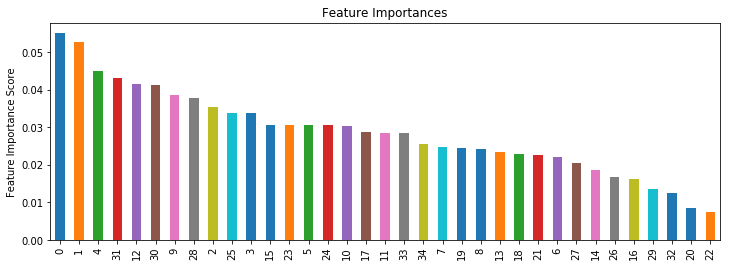

In [28]:
modelfit(gsearch4.best_estimator_, train, predictors)

# 0 , 1, 4 , 31 , 12 , 30 , 9  :  7 impo feature 

In [30]:
param_test5 = {'subsample':[0.5,0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100,max_depth=7,min_samples_split=1200, min_samples_leaf=80, subsample=0.8, random_state=10,max_features=7),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.83736, std: 0.00648, params: {'subsample': 0.5},
  mean: 0.83719, std: 0.00601, params: {'subsample': 0.6},
  mean: 0.83755, std: 0.00685, params: {'subsample': 0.7},
  mean: 0.83808, std: 0.00656, params: {'subsample': 0.75},
  mean: 0.83801, std: 0.00590, params: {'subsample': 0.8},
  mean: 0.83750, std: 0.00674, params: {'subsample': 0.85},
  mean: 0.83806, std: 0.00597, params: {'subsample': 0.9}],
 {'subsample': 0.75},
 0.838080050832037)

# best sample value=.75

# increse n_estimation 180 and learning_rate .05


Model Report
Accuracy : 0.8307
AUC Score (Train): 0.861305
CV Score : Mean - 0.8401922 | Std - 0.006268757 | Min - 0.8296566 | Max - 0.8469826


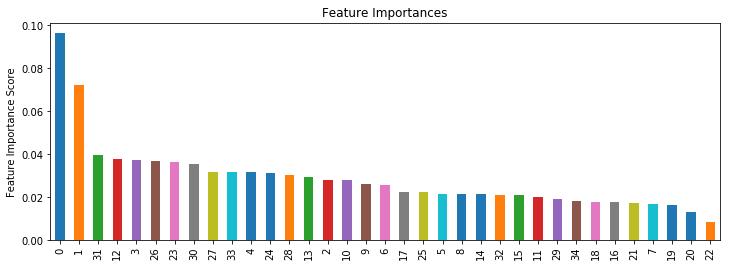

In [31]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=180,max_depth=7, min_samples_split=1200,min_samples_leaf=80, subsample=0.75, random_state=10, max_features=7)
modelfit(gbm_tuned_1, train, predictors)

# trees  600 and learning rate .01


Model Report
Accuracy : 0.8279
AUC Score (Train): 0.856739
CV Score : Mean - 0.8399007 | Std - 0.006402011 | Min - 0.8291088 | Max - 0.8466677


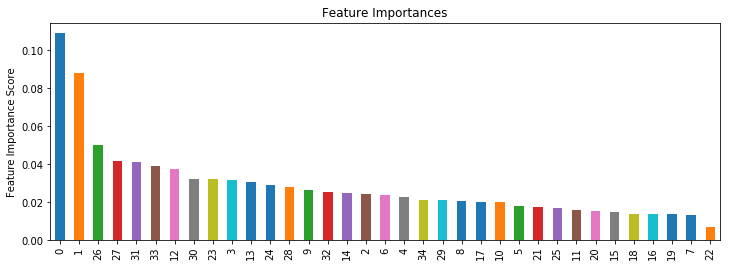

In [32]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=7, min_samples_split=1200,min_samples_leaf=80, subsample=0.75, random_state=10, max_features=7)
modelfit(gbm_tuned_2, train, predictors)

# 0.005 for 1200 trees.


Model Report
Accuracy : 0.8278
AUC Score (Train): 0.856728


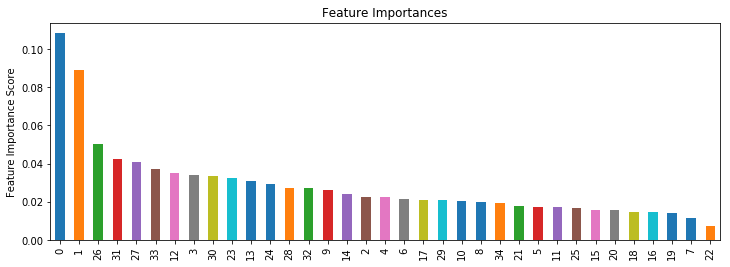

In [33]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=7, min_samples_split=1200, min_samples_leaf=80, subsample=0.75, random_state=10, max_features=7,
warm_start=True)
modelfit(gbm_tuned_3, train, predictors, performCV=False)

# try  n_estimates 1500


Model Report
Accuracy : 0.8301
AUC Score (Train): 0.859497


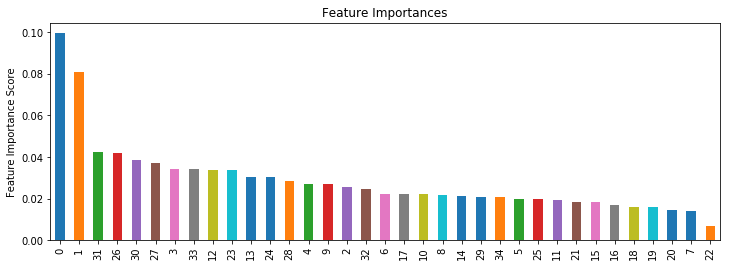

In [34]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=7, min_samples_split=1200, min_samples_leaf=80, subsample=0.75, random_state=10, max_features=7,
warm_start=True)
modelfit(gbm_tuned_3, train, predictors, performCV=False)

In [ ]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=7, min_samples_split=1200, min_samples_leaf=80, subsample=0.75, random_state=10, max_features=7,
warm_start=True)

In [ ]:
np.random.randint